In [ ]:
import pandas as pd
# URL of the CSV file
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/Resistencia/data/230622_AMR_mysterious_ETBC_all_nelly.csv'  # Replace with the actual GitHub URL of the CSV file

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Print the DataFrame
print(df)

# Getting consensus by city

# Function to calculate mode and concatenate "Species" and "City"
def calculate_mode_and_concatenate(group):
    mode_values = group.mode().iloc[0]
    group['ID'] = f"{group['Species'].iloc[0]}_{group['City'].iloc[0]}"
    return mode_values

# Group by "Species" and "City" columns, apply mode to each other column, and add "ID" column
df_grouped = df.groupby(["Species", "City"]).apply(calculate_mode_and_concatenate)

# Reset index to remove the grouped columns from the index
df_grouped.reset_index(drop=True, inplace=True)

# Print the resulting grouped DataFrame
print(df_grouped)

# Export the DataFrame as a CSV file
csv_file_path = 'Representants.csv'
df_grouped.to_csv(csv_file_path, index=False)
import pandas as pd

# Assuming your DataFrame is named 'df'

# Print the updated DataFrame
print(df)

# Print the file paths
print("CSV file saved:", csv_file_path)



         ID                  Species        City AST-based group  ARO:3000167  \
0        S1  Enterobacter hormaechei  mysterious   3GC-resistant          0.0   
1        S2  Enterobacter hormaechei  mysterious          CP CRE          0.0   
2        S3  Enterobacter hormaechei  mysterious          CP CRE          0.0   
3        S4  Enterobacter hormaechei  mysterious          CP CRE          0.0   
4        S5  Enterobacter hormaechei  mysterious          CP CRE          0.0   
..      ...                      ...         ...             ...          ...   
151  NYC_Kl    Klebsiella pneumoniae         NYC               0          0.0   
152  SAC_En  Enterobacter hormaechei         SAC               0          0.0   
153  DEN_Es         Escherichia coli         DEN               0          0.0   
154  DEN_Kl    Klebsiella pneumoniae         DEN               0          0.0   
155  SAN_En  Enterobacter hormaechei         SAN               0          0.0   

     ARO:3002847  mrkb  ent

In [ ]:
# Replace values in the 'ID' column
df_grouped['ID'] = df_grouped['ID'].replace({'S1': 'En_mysterious', 'S10': 'Es_mysterious','S100': 'Kl_mysterious'})

print(df_grouped)

0              ID                  Species        City AST-based group  \
0          BAL_En  Enterobacter hormaechei         BAL               0   
1          DEN_En  Enterobacter hormaechei         DEN               0   
2          MIN_En  Enterobacter hormaechei         MIN               0   
3          NYC_En  Enterobacter hormaechei         NYC               0   
4          SAC_En  Enterobacter hormaechei         SAC               0   
5          SAN_En  Enterobacter hormaechei         SAN               0   
6   En_mysterious  Enterobacter hormaechei  mysterious          CP CRE   
7          DEN_Es         Escherichia coli         DEN               0   
8          NYC_Es         Escherichia coli         NYC               0   
9   Es_mysterious         Escherichia coli  mysterious          CP CRE   
10         DEN_Kl    Klebsiella pneumoniae         DEN               0   
11         NYC_Kl    Klebsiella pneumoniae         NYC               0   
12  Kl_mysterious    Klebsiella pneumo

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Assuming your DataFrame is named 'df_grouped'

# Select the columns of interest
columns_of_interest = df_grouped.columns[4:508]

# Calculate the pairwise distances
dist_matrix = pdist(df_grouped[columns_of_interest].values, metric='euclidean')

# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)

# Create a DataFrame from the distance matrix
df_dist_matrix = pd.DataFrame(dist_matrix_square, index=df_grouped.index, columns=df_grouped.index)

# Print the distance matrix DataFrame
print(df_dist_matrix)




           0          1          2          3          4          5   \
0    0.000000   6.708204   7.000000  11.661904   7.348469   6.928203   
1    6.708204   0.000000   3.464102  13.152946   4.795832   3.316625   
2    7.000000   3.464102   0.000000  13.527749   3.605551   1.000000   
3   11.661904  13.152946  13.527749   0.000000  13.114877  13.564660   
4    7.348469   4.795832   3.605551  13.114877   0.000000   3.464102   
5    6.928203   3.316625   1.000000  13.564660   3.464102   0.000000   
6    8.660254   8.246211   8.124038  11.445523   8.185353   8.185353   
7    6.928203   3.316625   1.000000  13.564660   3.464102   0.000000   
8    8.426150   7.211103   6.782330  12.529964   6.855655   6.708204   
9   12.845233  12.569805  12.649111  13.674794  12.688578  12.688578   
10   6.928203   3.316625   1.000000  13.564660   3.464102   0.000000   
11  11.575837  12.845233  13.228757   8.831761  12.806248  13.190906   
12  11.747340  11.180340  11.000000  12.569805  10.770330  10.95

<ipython-input-4-4d3cdce4cfe1>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(df_dist_matrix.values, method='ward')


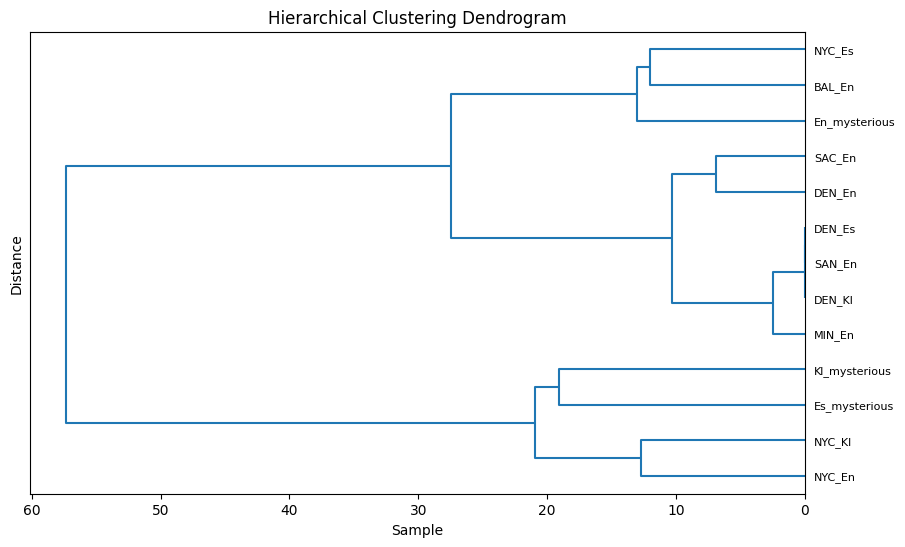

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming your distance matrix DataFrame is named 'df_dist_matrix'

# Calculate the linkage matrix
linkage_matrix = linkage(df_dist_matrix.values, method='ward')
labels = df_grouped['ID'].values

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=labels, color_threshold=0, orientation='left', leaf_font_size=8)
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Show the plot
plt.show()


<ipython-input-88-6510a0a858da>:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(df_distance.values, method='ward')


Newick string:
((((((NYC_Es:13.92,BAL_En:13.92):18.43,((SAC_En:8.79,DEN_En:8.79):2.65,(((DEN_Kl:0.00,DEN_Es:0.00):0.00,SAN_En:0.00):2.66,MIN_En:2.66):8.77):20.91):49.01,((((S3:0.00,S3:0.00):15.60,(S2:0.00,S2:0.00):15.60):4.44,(S4:0.00,S4:0.00):20.04):5.76,(((((S7:0.00,S7:0.00):10.70,(S5:0.00,S5:0.00):10.70):1.56,(S8:0.00,S8:0.00):12.26):1.85,(S1:0.00,S1:0.00):14.11):2.61,(S6:0.00,S6:0.00):16.72):9.08):55.56):175.47,((((((S14:0.00,S14:0.00):26.33,(S13:0.00,S13:0.00):26.33):0.18,(S11:0.00,S11:0.00):26.51):13.17,((S22:0.00,S22:0.00):16.84,(S10:0.00,S10:0.00):16.84):22.84):16.02,(((S17:0.00,S17:0.00):13.22,(S12:0.00,S12:0.00):13.22):2.49,(S9:0.00,S9:0.00):15.70):39.99):11.07,(((((S21:0.00,S21:0.00):22.01,(S18:0.00,S18:0.00):22.01):3.36,(S19:0.00,S19:0.00):25.38):6.15,((S16:0.00,S16:0.00):15.07,(S15:0.00,S15:0.00):15.07):16.46):15.41,(S20:0.00,S20:0.00):46.94):19.83):190.05):437.99,((((((((((((NYC_2015_GCF_027584385.1:7.61,SAN_2018_GCF_019927885.1:7.61):2.28,BAL_2017_GCF_003861475.1:9.88):0

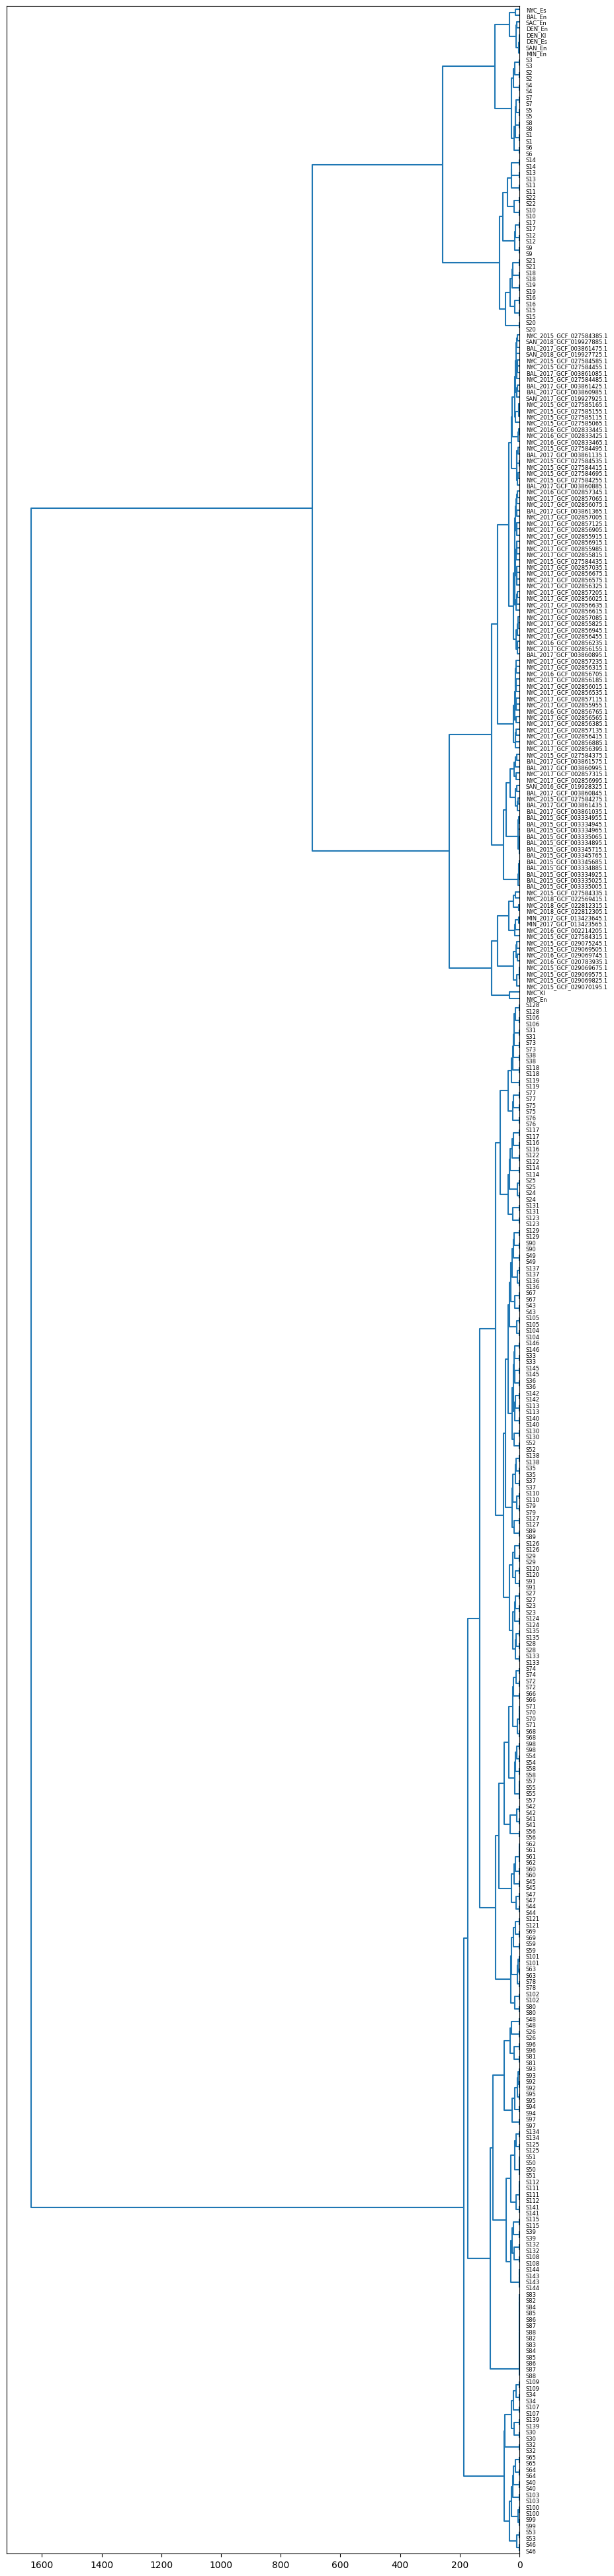

In [ ]:
import pandas as pd
import requests
from io import StringIO
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Define the URLs
url1 = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/data/230622_AMR_mysterious_ETBC_all_nelly.csv'
url2 = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/main/06_amr_resistance/data/230626_AMR_mysterious_NCBI_all_nelly.csv'

# Make a GET request to fetch the data from the URLs
response1 = requests.get(url1)
response2 = requests.get(url2)

# Read the response content into DataFrames
df1 = pd.read_csv(StringIO(response1.text))
df2 = pd.read_csv(StringIO(response2.text))

# Concatenate the DataFrames
merged_df = pd.concat([df1, df2], axis=0)

# Select the columns of interest
df_data = merged_df.iloc[:, 4:509]
labels = merged_df['ID'].values

# Reset the index of the DataFrame
df_data.reset_index(drop=True, inplace=True)

# Calculate the distance matrix using the rows of the DataFrame
distance_matrix = pdist(df_data.values, metric='euclidean')

# Convert the distance matrix to a square matrix
distance_matrix_square = squareform(distance_matrix)

# Create a new DataFrame with the distance matrix
df_distance = pd.DataFrame(distance_matrix_square, index=df_data.index, columns=df_data.index)

# Perform hierarchical clustering on the distance matrix
Z = linkage(df_distance.values, method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 50))
dendo = dendrogram(Z, color_threshold=0, labels=labels, leaf_font_size=6, orientation='left', ax=ax)

def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

tree = hierarchy.to_tree(Z, False)
newick_string=get_newick(tree, tree.dist, labels)

# Print the Newick string
print("Newick string:")
print(newick_string)


# Save Newick string to a file
file_path = 'Full_Newick.nwk'
with open(file_path, 'w') as file:
    file.write(newick_string)


[[0.         1.73205081 1.        ]
 [1.73205081 0.         2.        ]
 [1.         2.         0.        ]]
          0         1    2
0  0.000000  1.732051  1.0
1  1.732051  0.000000  2.0
2  1.000000  2.000000  0.0


<ipython-input-39-54c7941d414e>:22: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(df_distance.values, method='average')


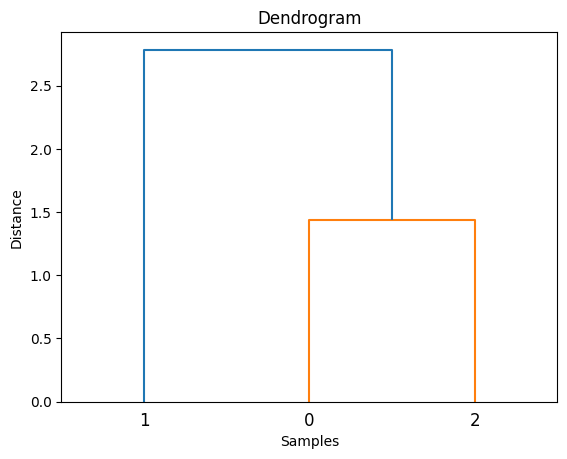

In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Create a dataframe with the rows you provided
data = [[0, 0, 1, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 1]]
df = pd.DataFrame(data)

# Calculate the distance matrix
distance_matrix = pdist(df.values, metric='euclidean')

# Convert the distance matrix to a square matrix
distance_matrix_square = squareform(distance_matrix)
print(distance_matrix_square)
# Create a new dataframe with the distance matrix
df_distance = pd.DataFrame(distance_matrix_square, index=df.index, columns=df.index)
print(df_distance)
# Perform hierarchical clustering on the distance matrix
Z = linkage(df_distance.values, method='average')

# Create the dendrogram
dendrogram(Z)

# Show the dendrogram
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()